In [1]:
# Urban Street Network Centrality Analysis

import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline

In [2]:
# download and project a street network
graph = ox.graph_from_place('Pokhara, Nepal', network_type='drive', simplify=True)

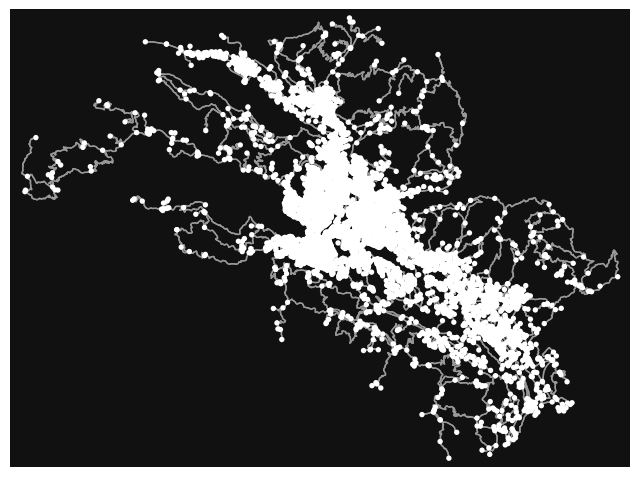

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [3]:
ox.plot_graph(graph)

In [4]:
ox.project_graph(graph, 4326)

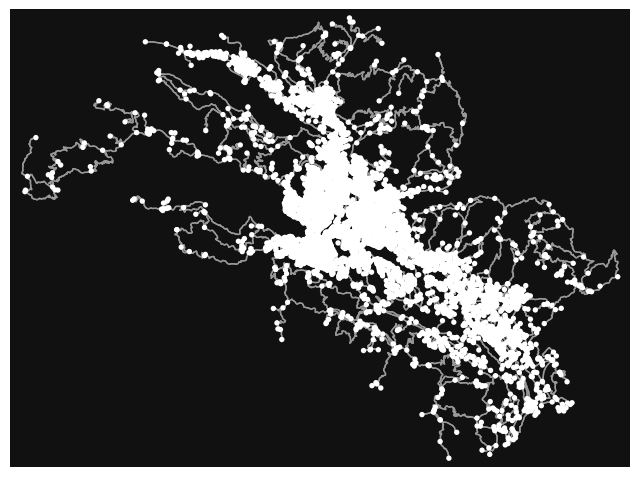

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [5]:
ox.plot_graph(graph)

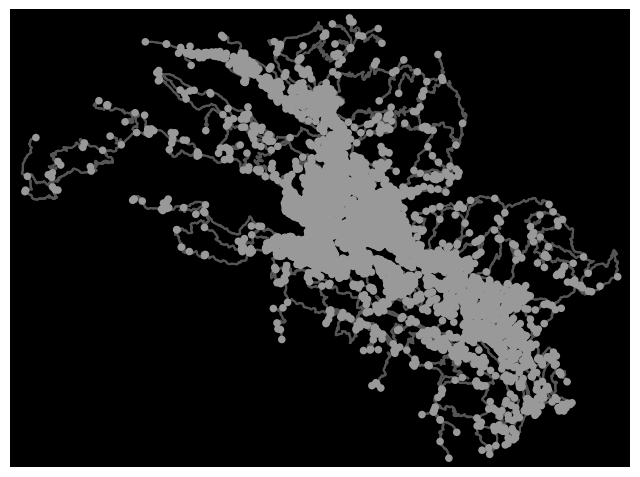

In [6]:
fig, ax = ox.plot_graph(graph, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

In [7]:
# node closeness centrality
node_centrality = nx.closeness_centrality(graph)

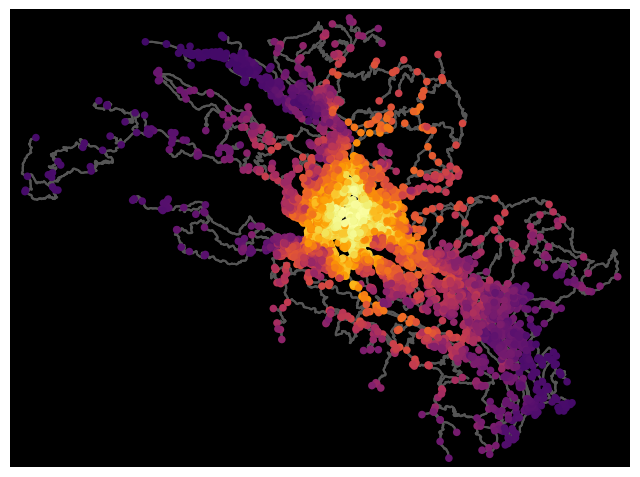

In [8]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(graph.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(graph, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

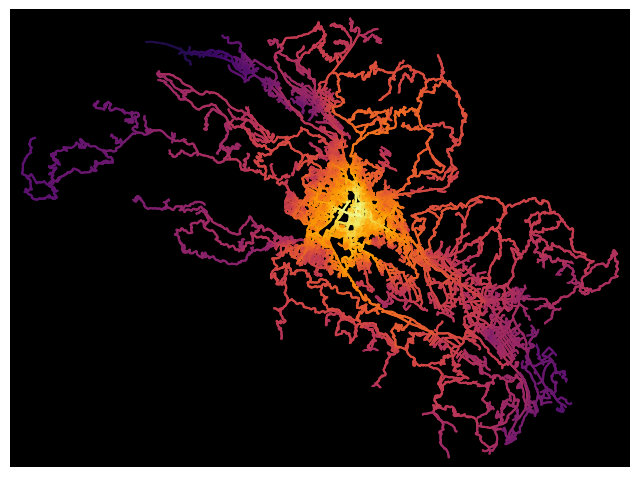

In [26]:
fig

In [9]:
# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(graph))

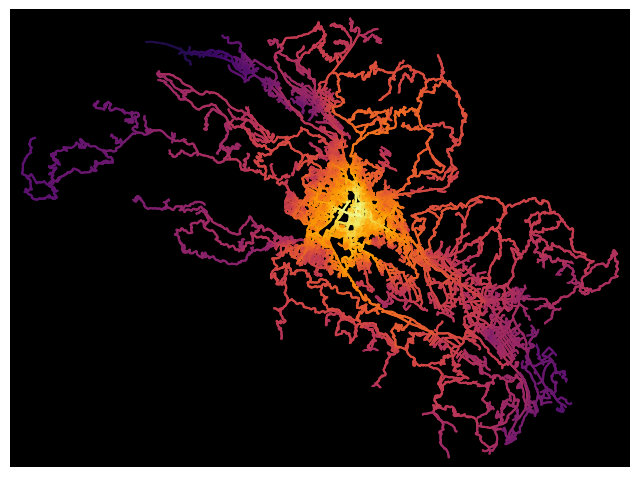

In [32]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in graph.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(graph, bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1, save=True, filepath='D:/Go/OSMNX/centrality.pdf', dpi=500)

In [29]:
# save a shapefile with centrality as node and edge attributes
nx.set_node_attributes(graph, node_centrality, 'node_centrality')
nx.set_edge_attributes(graph, edge_centrality, 'edge_centrality')
ox.save_graph_shapefile(graph,filepath='D:\Go\OSMNX', encoding='utf-8')

D:\Prakash\Required\Anaconda\envs\gdalEnv\envs\ox\Lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
D:\Prakash\Required\Anaconda\envs\gdalEnv\envs\ox\Lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [15]:
import matplotlib.pyplot as plt
plt.savefig('edge_centrality.png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [24]:
ox.io.save_graph_geopackage(graph, 'D:/Go/OSMNX/New folder/centrality.gpkg', encoding='utf-8')

In [25]:
ox.io.save_graphml(graph, 'D:/Go/OSMNX/New folder/centrality.graphml', gephi=False, encoding='utf-8')

In [ ]:
nx.set_node_attributes(graph, node_centrality, 'node_centrality')
nx.set_edge_attributes(graph, edge_centrality, 'edge_centrality')
ox.save_graph_shapefile(graph,filepath='D:/Go/OSMNX/New folder', encoding='utf-8')